指数回帰の自主トレーニング

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [35]:
def f(x, theta0, theta1):
    return theta0 * theta1**x

In [36]:
def calc_error(xs, theta0, theta1, ys):
    err = 0
    for i, x in enumerate(xs):
        err += (
            math.log(theta0, math.e)
            + x * math.log(theta1, math.e)
            - math.log(ys[i] + 1)
        )
    return 1 / 2 * err

In [39]:
def resolve(xs, ys):
    phi = np.array([[1, x] for x in xs])  # 計画行列
    print(f"{phi=}")
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    print(f"{tmp=}")
    log_ys = [math.log(y, math.e) for y in ys]
    print(f"{log_ys=}")
    log_theta = np.dot(np.dot(tmp, phi.T), log_ys)
    print(f"{log_theta=}")
    return log_theta

phi=array([[  1, -15],
       [  1,   0],
       [  1,  10],
       [  1,  17]])
tmp=array([[ 0.26557093, -0.00519031],
       [-0.00519031,  0.0017301 ]])
log_ys=[-0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046]
log_theta=array([0.514171  , 0.09684932])
approx_theta0=np.float64(1.6722516329525865), approx_theta1=np.float64(1.1016943558618517)
error=-1.0346956029131682


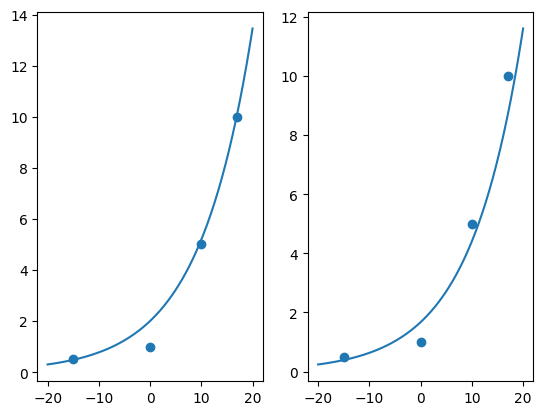

In [41]:
true_xs = np.linspace(-20, 20, 400)
true_theta = [2, 1.1]
true_ys = [f(x, true_theta[0], true_theta[1]) for x in true_xs]

sample_xs = [-15, 0, 10, 17]
sample_ys = [0.5, 1, 5, 10]

_, axes = plt.subplots(1, 2)
axes[0].plot(true_xs, true_ys)
axes[0].scatter(sample_xs, sample_ys)

approx_log_theta = resolve(sample_xs, sample_ys)
approx_theta0, approx_theta1 = (
    math.e ** approx_log_theta[0],
    math.e ** approx_log_theta[1],
)
print(f"{approx_theta0=}, {approx_theta1=}")
error = calc_error(sample_xs, approx_theta0, approx_theta1, sample_ys)
print(f"{error=}")
approx_ys = [f(x, approx_theta0, approx_theta1) for x in true_xs]
axes[1].plot(true_xs, approx_ys)
axes[1].scatter(sample_xs, sample_ys)